In [1]:
1

1

In [4]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [5]:
epl_df = pd.read_csv('./EPL_Soccer_MLR_LR.csv')
epl_df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


In [6]:
epl_df.info

<bound method DataFrame.info of                          PlayerName Club  DistanceCovered(InKms)  Goals  \
0           Braund, Mr. Owen Harris  MUN                    3.96    7.5   
1          Allen, Mr. William Henry  MUN                    4.41    8.3   
2                  Moran, Mr. James  MUN                    4.14    5.0   
3           McCarthy, Mr. Timothy J  MUN                    4.11    5.3   
4    Palsson, Master. Gosta Leonard  MUN                    4.45    6.8   
..                              ...  ...                     ...    ...   
197               Ryan, Mr. Patrick  LIV                    4.90    7.6   
198                  Saad, Mr. Amin  LIV                    5.66    8.3   
199                Saad, Mr. Khalil  LIV                    5.03    6.4   
200           Saade, Mr. Jean Nassr  LIV                    4.97    8.8   
201            Sadlier, Mr. Matthew  LIV                    5.38    6.3   

     MinutestoGoalRatio  ShotsPerGame  AgentCharges    BMI   Cost  

In [7]:
epl_df.isnull().sum()

PlayerName                0
Club                      0
DistanceCovered(InKms)    0
Goals                     0
MinutestoGoalRatio        0
ShotsPerGame              0
AgentCharges              0
BMI                       0
Cost                      0
PreviousClubCost          0
Height                    0
Weight                    0
Score                     0
dtype: int64

In [8]:
epl_df.corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4656\944394471.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  epl_df.corr()


,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


### simple linear regression model


In [9]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
X = epl_df[['DistanceCovered(InKms)']]
y = epl_df['Score']

In [11]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Step 6: Model Ko Test Karein
y_pred = model.predict(X_test)

In [17]:
print("Intercept:", model.intercept_)  # Y-intercept
print("Coefficient:", model.coef_) 

Intercept: 51.79393279243833
Coefficient: [-8.04292219]


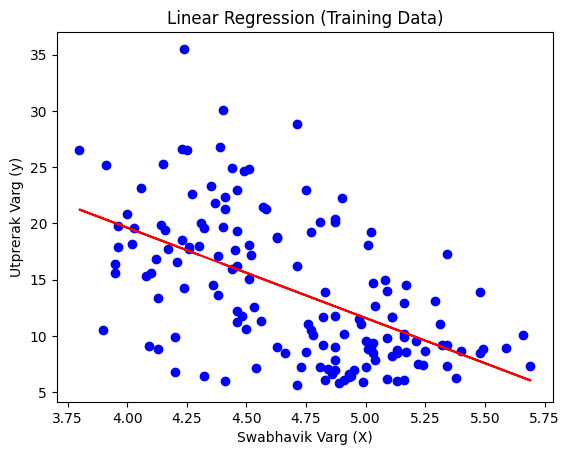

In [18]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, model.predict(X_train), color='red')
plt.title('Linear Regression (Training Data)')
plt.xlabel('Swabhavik Varg (X)')
plt.ylabel('Utprerak Varg (y)')
plt.show()

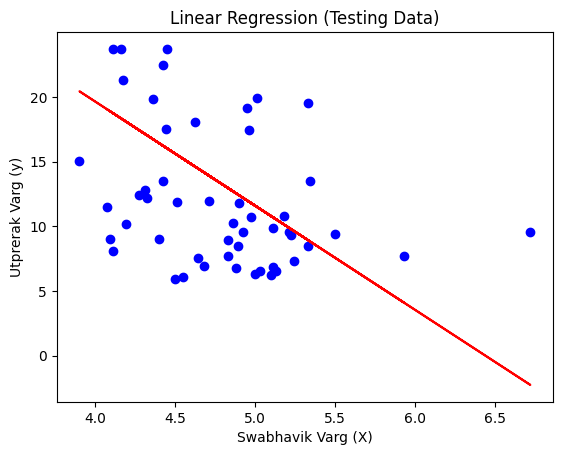

In [20]:
# Visualize the testing data and predictions
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Linear Regression (Testing Data)')
plt.xlabel('Swabhavik Varg (X)')
plt.ylabel('Utprerak Varg (y)')
plt.show()

## lurking variables

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4656\2246414364.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = epl_df.corr()


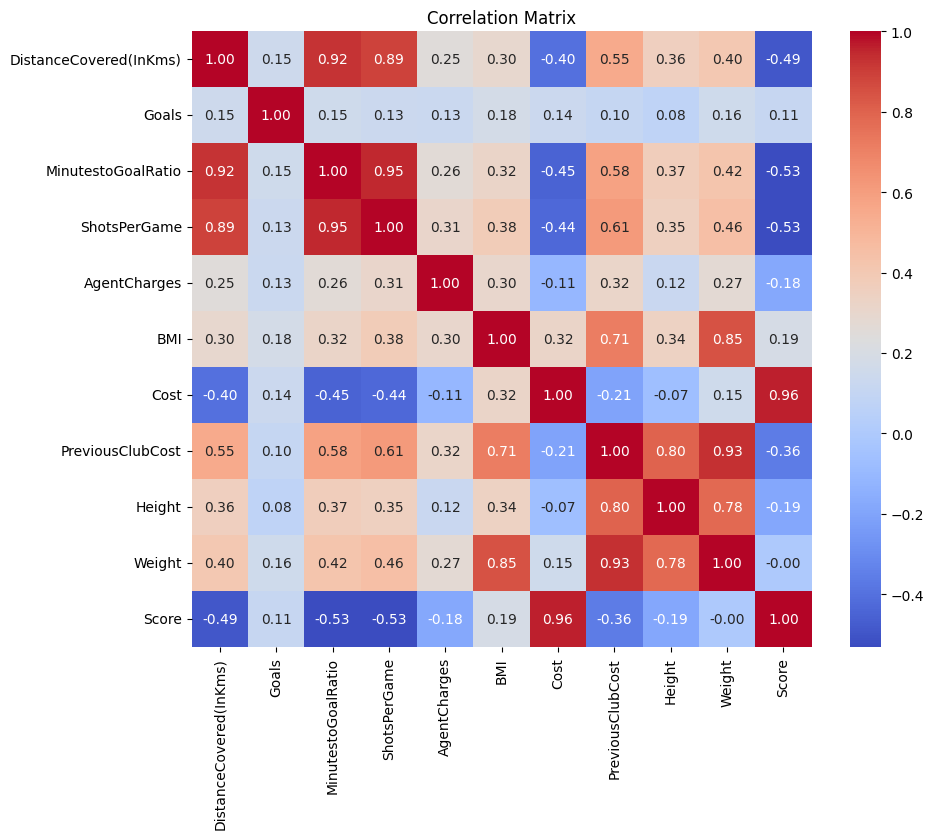

In [21]:
correlation_matrix = epl_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [22]:
## here lurking variable are the variable which have good correlation with y means score


derivation of least square estimates

In [23]:
X_with_intercept = sm.add_constant(X)

In [24]:
model = sm.OLS(y, X_with_intercept).fit()

In [25]:
coefficients = model.params

In [26]:
print("Intercept:", coefficients[0])
print("Slope:", coefficients[1])

Intercept: 44.981122765882795
Slope: -6.670114984586352


In [27]:
print("Expected value of slope (true value is 4):", np.mean(coefficients[1]))


Expected value of slope (true value is 4): -6.670114984586352


In [28]:
residuals = model.resid
print("Mean of residuals:", np.mean(residuals))


Mean of residuals: 1.3085242460532539e-14


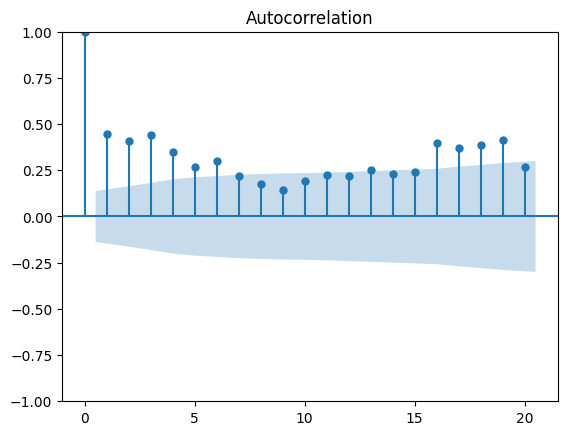

In [29]:
sm.graphics.tsa.plot_acf(residuals, lags=20)
plt.show()

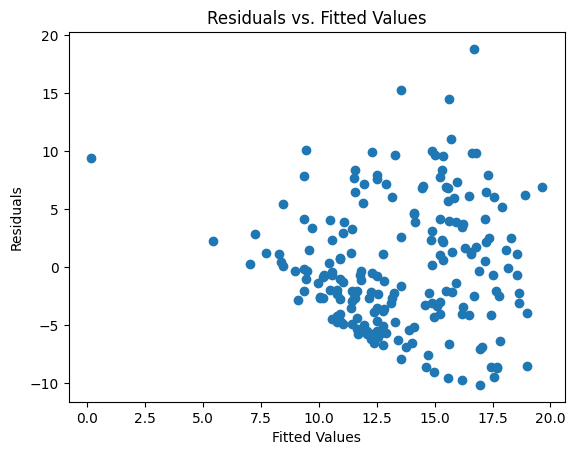

In [30]:
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

Gauss-Markov Theorem ke liye kuch assumptions hote hain:

Dependent aur independent variables ka sambandh linear hona chahiye.
Residuals ka mean zero hona chahiye.
Residuals ke beech ka correlation zero hona chahiye (i.e., residuals independent hona chahiye).
Residuals ka variance constant hona chahiye (i.e., homoscedasticity).
Residuals ka distribution normal hona chahiye.

 Maximum Likelihood Estimator (MLE)

In [33]:
# Assuming 'data' is your DataFrame with dependent and independent variables
import statsmodels.api as sm

# Fit the linear regression model using maximum likelihood estimation
model = sm.OLS(y, sm.add_constant(X)).fit()

# Get the parameter estimates (coefficients)
mle_coefficients = model.params

print("MLE Coefficients (Intercept, Slope):", mle_coefficients)


MLE Coefficients (Intercept, Slope): const                     44.981123
DistanceCovered(InKms)    -6.670115
dtype: float64


In [35]:
import pymc3 as pm
from linearmodels.iv import IV2SLS

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\theano\scalar\basic.py:2412: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  self.ctor = getattr(np, o_type.dtype)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
X_with_intercept = sm.add_constant(X)

# Least Squares Estimator (LSE)
model_ols = sm.OLS(y, X_with_intercept).fit()
ols_coefficients = model_ols.params

# Maximum Likelihood Estimator (MLE)
model_mle = sm.OLS(y, X_with_intercept).fit()
mle_coefficients = model_mle.params

# Method of Moments Estimator (MME)
X_mean = np.mean(X)
y_mean = np.mean(y)
mme_slope = np.cov(X.squeeze(), y.squeeze(), ddof=0)[0, 1] / np.var(X.squeeze(), ddof=0)
mme_intercept = y_mean - mme_slope * X_mean

# Generalized Method of Moments (GMM)
model_gmm = IV2SLS(dependent=y, exog=X, endog=None, instruments=None).fit()
gmm_coefficients = model_gmm.params

# Bayesian Estimation
with pm.Model() as linear_model:
    # Priors for coefficients
    intercept = pm.Normal('intercept', mu=0, sigma=10)
    slope = pm.Normal('slope', mu=0, sigma=10)
    
    # Likelihood
    likelihood = pm.Normal('y', mu=intercept + slope * X.squeeze(), sigma=1, observed=y.squeeze())
    
    # Use Maximum A Posteriori (MAP) estimation
    map_estimate = pm.find_MAP()

# Print the results
print("Least Squares Estimator (LSE) Coefficients:", ols_coefficients)
print("Maximum Likelihood Estimator (MLE) Coefficients:", mle_coefficients)
print("Method of Moments Estimator (MME) Coefficients (Intercept, Slope):", mme_intercept, mme_slope)
print("Generalized Method of Moments (GMM) Coefficients:", gmm_coefficients)
print("Bayesian Estimation Coefficients (Intercept, Slope):", map_estimate['intercept'], map_estimate['slope'])

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


NameError: name 'IV2SLS' is not defined

In [37]:
slope_samples = []
intercept_samples = []

# Generate multiple samples and fit regression models to each sample
num_samples = 1000
for _ in range(num_samples):
    # Resample data with replacement
    indices = np.random.choice(len(X), len(X), replace=True)
    X_sampled = X_with_intercept[indices]
    y_sampled = y[indices]
    
    # Fit regression model to sampled data
    model = sm.OLS(y_sampled, X_sampled).fit()
    
    # Store coefficient estimates
    slope_samples.append(model.params[1])
    intercept_samples.append(model.params[0])

# Plot histograms of coefficient estimates
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(slope_samples, bins=30, color='skyblue', edgecolor='black')
plt.title('Sampling Distribution of Slope (Coefficient)')
plt.xlabel('Slope')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(intercept_samples, bins=30, color='lightgreen', edgecolor='black')
plt.title('Sampling Distribution of Intercept')
plt.xlabel('Intercept')
plt.ylabel('Frequency')

KeyError: "None of [Int64Index([ 49, 133, 156,  81, 145, 101,  22,  99, 178,  10,\n            ...\n            138, 106, 151, 116, 135, 143, 148,  95,  75,   2],\n           dtype='int64', length=202)] are in the [columns]"

#### residual anaysis


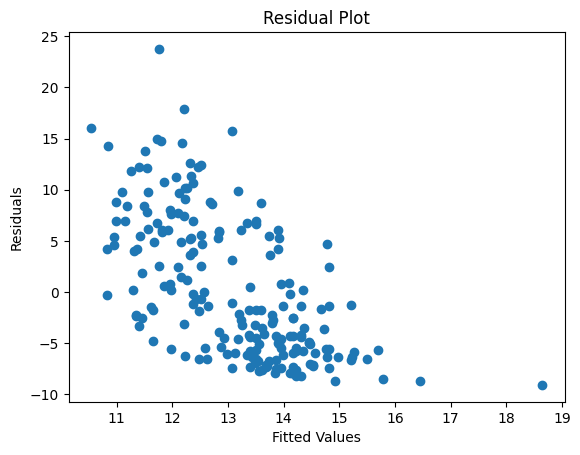

In [38]:
import statsmodels.api as sm

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the residuals
residuals = model.resid

# Plot residuals to check for patterns
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


Multicollinearity Diagnosis:

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


ValueError: zero-size array to reduction operation maximum which has no identity

In [41]:
import statsmodels.stats.api as sms

# Perform Breusch-Pagan test for heteroskedasticity
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
print("Breusch-Pagan Test p-value:", bp_test[1])


ValueError: The Breusch-Pagan test requires exog to have at least two columns where one is a constant.

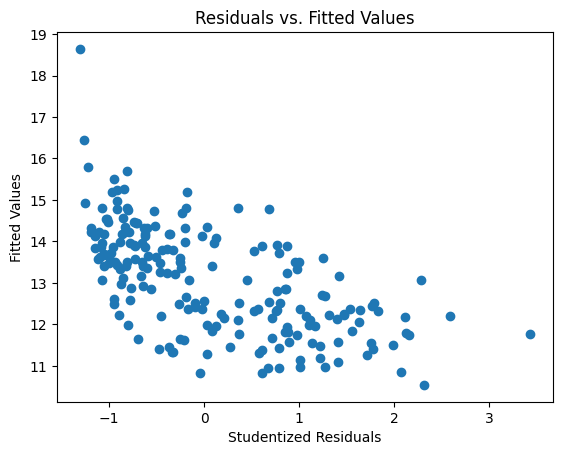

In [42]:
# Plot studentized residuals
plt.scatter(model.resid_pearson, model.fittedvalues)
plt.xlabel('Studentized Residuals')
plt.ylabel('Fitted Values')
plt.title('Residuals vs. Fitted Values')
plt.show()
